# 📈 Budget Day Impact on Indian Stock Market
This project aims to forecast stock prices using Facebook Prophet and assess the impact of India's Union Budget (typically announced on February 1st) on major Indian stocks and sectors. We also explore how holidays and macroeconomic events influence market movements.


## 🔍 Objective:
- Use Facebook Prophet to build a time series forecasting model.
- Visualize holiday impacts on stock prices.
- Analyze market trends before and after Budget Day announcements.




In [1]:
pip install yfinance prophet plotly

**Data Collection**

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import warnings

warnings.filterwarnings('ignore')

# Use RELIANCE instead of INFY
d = yf.download("RELIANCE.NS", start="2014-01-01", end="2025-01-01")

# Reset index
d.reset_index(inplace=True)

print(d.head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price        Date       Close        High         Low        Open      Volume
Ticker            RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS
0      2014-01-01  196.930542  199.024369  196.664652  198.847104     5849398
1      2014-01-02  193.872894  198.525844  192.787207  196.686815     6023632
2      2014-01-03  191.491013  193.507292  189.441499  193.119543    12833897
3      2014-01-06  189.430420  191.269449  188.333655  191.014638    13315857
4      2014-01-07  186.583267  190.538265  186.129049  189.352875    17311470


**Data Preprocessing**

In [3]:
#Flatten multi-index column names if needed
d.columns = [col[0] if isinstance(col, tuple) else col for col in d.columns]

df = pd.DataFrame()
df['ds'] = pd.to_datetime(d['Date'])                  # Date
df['y'] = pd.to_numeric(d['Close'], errors='coerce')  # Closing price

df.dropna(inplace=True)

**Forecasting with Facebook Prophet**

In [4]:
df

,ds,y
0,2014-01-01,196.930542
1,2014-01-02,193.872894
2,2014-01-03,191.491013
3,2014-01-06,189.430420
4,2014-01-07,186.583267
...,...,...
2706,2024-12-24,1222.750000
2707,2024-12-26,1216.550049
2708,2024-12-27,1221.050049
2709,2024-12-30,1210.699951


In [5]:
model = Prophet()
model.fit(df)

# Step 7: Predict for next 90 days
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8zg0cl6n/09tugt4s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8zg0cl6n/nnnt3g89.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20341', 'data', 'file=/tmp/tmp8zg0cl6n/09tugt4s.json', 'init=/tmp/tmp8zg0cl6n/nnnt3g89.json', 'output', 'file=/tmp/tmp8zg0cl6n/prophet_model5_ivxeqe/prophet_model-20250428055553.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:55:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:55:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**Visualizing Forecast**

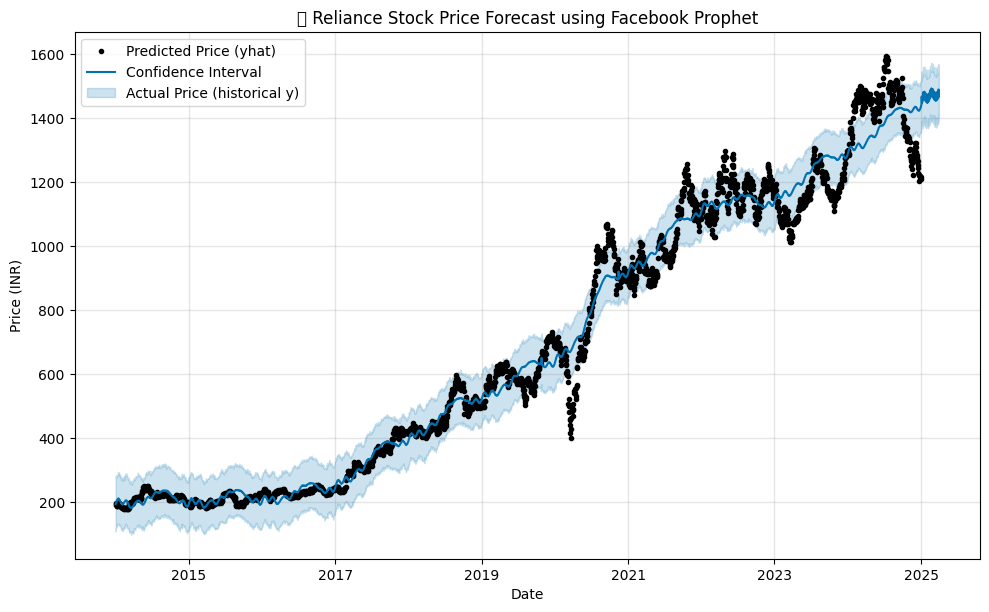

In [6]:
fig = model.plot(forecast)

# Title and labels
plt.title("📈 Reliance Stock Price Forecast using Facebook Prophet")
plt.xlabel("Date")
plt.ylabel("Price (INR)")

# Add custom legend
plt.legend([
    "Predicted Price (yhat)",         # Black line
    "Confidence Interval",            # Light blue shade
    "Actual Price (historical y)"     # Blue dots
], loc='upper left')

plt.show()


**CI shows the range within which the actual stock price is expected to fall — with a certain confidence level, typically 80% or 95%.**



---



**Interactive graph**

In [7]:
from prophet.plot import plot_plotly

fig = plot_plotly(model, forecast)
fig.update_layout(
    title="📈 Reliance Stock Price Forecast (Interactive)",
    xaxis_title="Date",
    yaxis_title="Price (INR)"
)
fig.show()


# Adding Holiday Effects in Prophet

In [8]:
from prophet.serialize import model_to_json, model_from_json

In [9]:
indian_holidays = pd.DataFrame({
    'holiday': ['Diwali', 'Holi', 'Independence_day', 'Republic_day', 'Christmas'],
    'ds' : pd.to_datetime([
        '2022-10-24',  # Diwali
        '2022-03-18',  # Holi
        '2022-08-15',  # Independence Day
        '2022-01-26',  # Republic Day
        '2022-12-25',  # Christmas
    ]),
        'lower_window': 0,
        'upper_window': 1  # Means it can affect even the next day
})

In [10]:
model = Prophet(holidays=indian_holidays)
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8zg0cl6n/lv69tdij.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8zg0cl6n/fz4j65g0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37377', 'data', 'file=/tmp/tmp8zg0cl6n/lv69tdij.json', 'init=/tmp/tmp8zg0cl6n/fz4j65g0.json', 'output', 'file=/tmp/tmp8zg0cl6n/prophet_modelsimdao5y/prophet_model-20250428055557.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:55:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:55:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


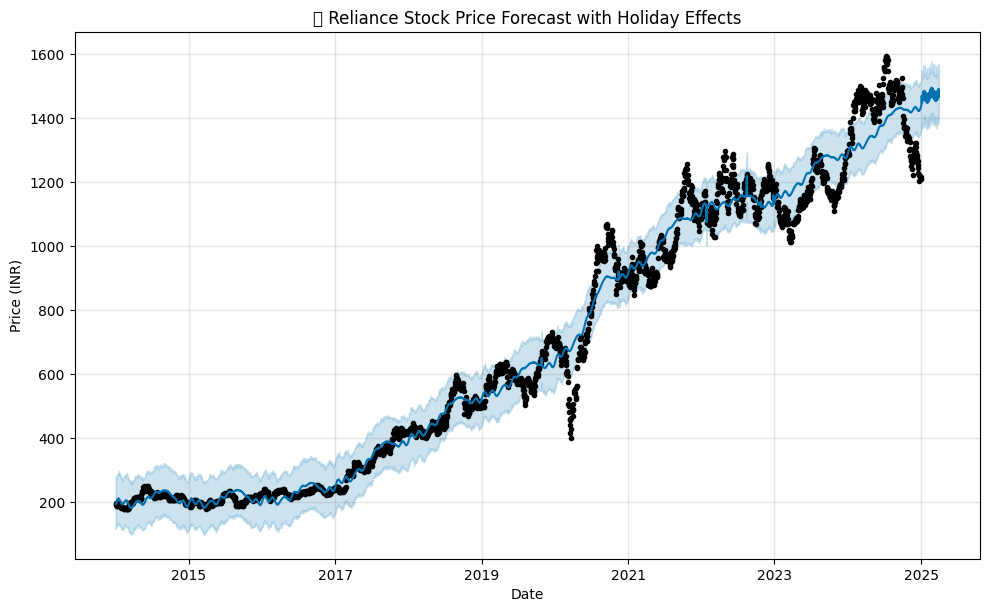

In [11]:
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

# Plot
fig = model.plot(forecast)
plt.title("📈 Reliance Stock Price Forecast with Holiday Effects")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.show()


**See Holiday Impacts**

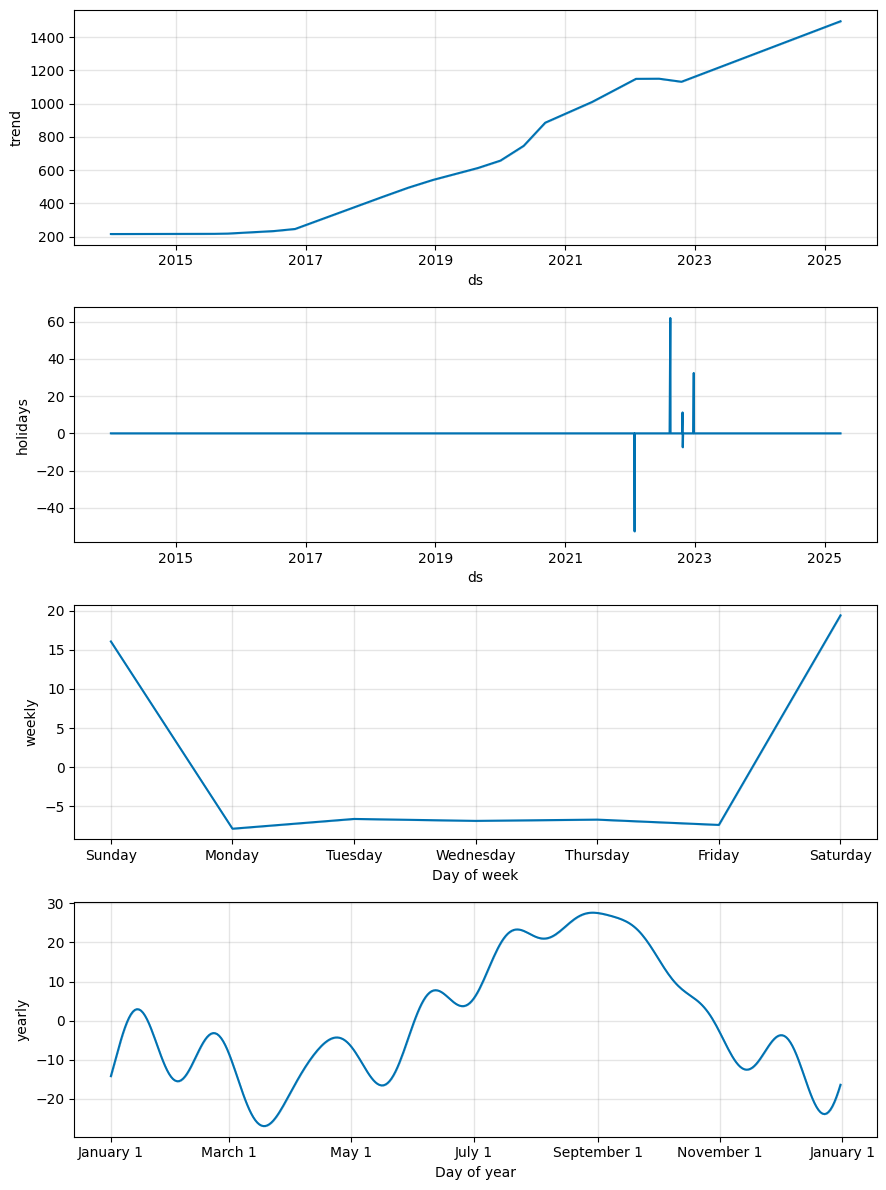

In [12]:
fig2 = model.plot_components(forecast)
plt.show()

# 📅 Analyze the Impact of Budget Day

We now specifically analyze how India's Union Budget (announced on February 1st each year) affects stock prices.

- We create a special "Budget Day" holiday event.
- We combine Budget Day with other major holidays (like Diwali, Holi) to better capture their joint influence.
- Then, we retrain Prophet including these holiday effects and visualize the results.


In [13]:
budget_days = pd.DataFrame({
    'holiday': 'Budget Day',
    'ds': pd.to_datetime([
        '2017-02-01', '2018-02-01', '2019-02-01', '2020-02-01',
        '2021-02-01', '2022-02-01', '2023-02-01', '2024-02-01'
    ]),
    'lower_window': 0,
    'upper_window': 1
})

In [14]:
all_holidays = pd.concat([indian_holidays, budget_days], ignore_index=True)

model = Prophet(holidays=all_holidays)

In [15]:
model.fit(df)  # df should have 'ds' and 'y' columns
forecast = model.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8zg0cl6n/5bp4ihpu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8zg0cl6n/20uf7b82.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26354', 'data', 'file=/tmp/tmp8zg0cl6n/5bp4ihpu.json', 'init=/tmp/tmp8zg0cl6n/20uf7b82.json', 'output', 'file=/tmp/tmp8zg0cl6n/prophet_modelmebppffx/prophet_model-20250428055604.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:56:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:56:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [16]:
budget_impact = forecast[forecast['ds'].isin(budget_days['ds'])][['ds', 'holidays']]
budget_impact = budget_impact.merge(budget_days, on='ds', how='left')
budget_impact.sort_values(by='holidays', ascending=False, inplace=True)

Holidays shows the estimated impact of Budget Day on the stock price.

In [17]:
print(budget_impact)

          ds  holidays     holiday  lower_window  upper_window
0 2017-02-01 -1.159815  Budget Day             0             1
1 2018-02-01 -1.159815  Budget Day             0             1
2 2019-02-01 -1.159815  Budget Day             0             1
3 2021-02-01 -1.159815  Budget Day             0             1
4 2022-02-01 -1.159815  Budget Day             0             1
5 2023-02-01 -1.159815  Budget Day             0             1
6 2024-02-01 -1.159815  Budget Day             0             1


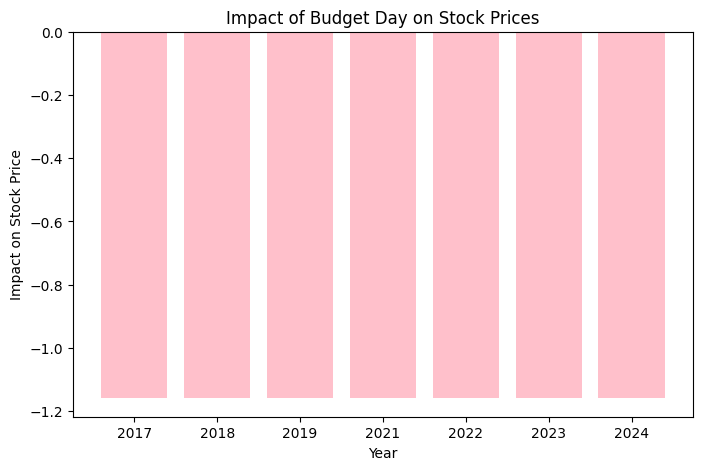

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(budget_impact['ds'].dt.year.astype(str), budget_impact['holidays'], color='pink')
plt.xlabel('Year')
plt.ylabel('Impact on Stock Price')
plt.title('Impact of Budget Day on Stock Prices')
plt.show()


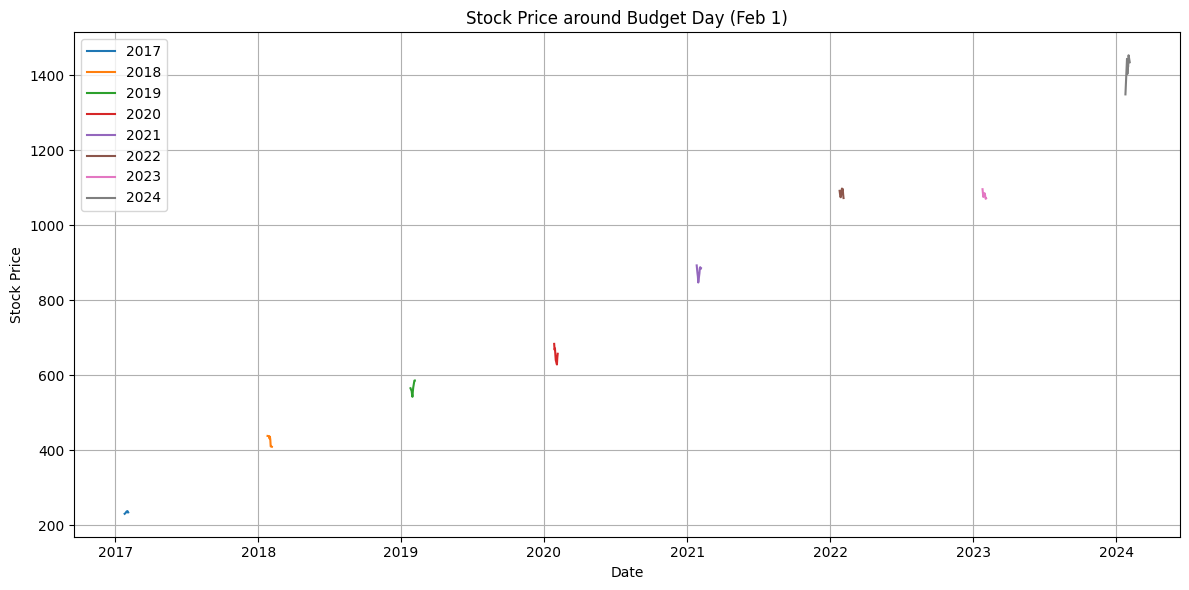

In [19]:
import matplotlib.pyplot as plt

# Filter data for a window around Feb 1 each year
window_prices = df[(df['ds'].dt.month == 1) & (df['ds'].dt.day >= 25) |
                   (df['ds'].dt.month == 2) & (df['ds'].dt.day <= 5)]

# Plot each year's Feb-window
plt.figure(figsize=(12, 6))
for year in range(2017, 2025):
    subset = window_prices[window_prices['ds'].dt.year == year]
    plt.plot(subset['ds'], subset['y'], label=str(year))

plt.title("Stock Price around Budget Day (Feb 1)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

We plotted the stock movement for:
- Budget Day (Feb 1)
- Post-budget days: Feb 2, 3, 4

This helps observe short-term reversal or continuation trends in price movements.


In [20]:
ticker = 'RELIANCE.NS'
tcs = yf.download(ticker, start='2019-01-01', end='2025-01-01')
tcs.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [21]:
budget_dates = {
    2020: '2020-02-01',
    2021: '2021-02-01',
    2022: '2022-02-01',
    2023: '2023-02-01',
    2024: '2024-02-01'
}

In [22]:
import pandas as pd

# Make sure Date column is datetime type
tcs['Date'] = pd.to_datetime(tcs['Date'])

for year, date in budget_dates.items():
    bday = pd.to_datetime(date)

    # Get 7 trading days before budget day
    pre_window = tcs[(tcs['Date'] < bday) & (tcs['Date'] >= bday - pd.Timedelta(days=14))].tail(7)

    # Get 7 trading days after budget day
    post_window = tcs[(tcs['Date'] >= bday) & (tcs['Date'] <= bday + pd.Timedelta(days=14))].head(7)

    # Compute mean close prices
    pre_avg = float(pre_window['Close'].mean())
    post_avg = float(post_window['Close'].mean())

    # Calculate percent change
    if pre_avg != 0:
        change = ((post_avg - pre_avg) / pre_avg) * 100
    else:
        change = 0

    # Format and print
    print(f"{year}: Pre Avg = {pre_avg:.2f}, Post Avg = {post_avg:.2f}, Change = {change:.2f}%")


2020: Pre Avg = 671.71, Post Avg = 650.85, Change = -3.11%
2021: Pre Avg = 903.99, Post Avg = 887.51, Change = -1.82%
2022: Pre Avg = 1101.68, Post Avg = 1084.34, Change = -1.57%
2023: Pre Avg = 1098.75, Post Avg = 1072.39, Change = -2.40%
2024: Pre Avg = 1377.51, Post Avg = 1438.57, Change = 4.43%


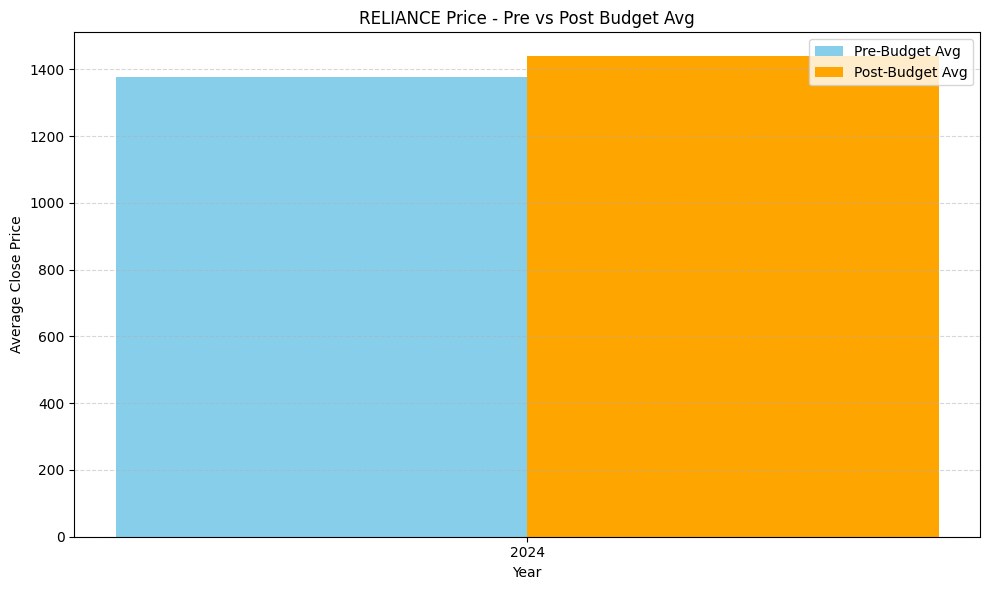

In [23]:
years = []
pre_avgs = []
post_avgs = []
pct_changes = []

years.append(year)
pre_avgs.append(pre_avg)
post_avgs.append(post_avg)
pct_changes.append(change)

x = range(len(years))
bar_width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x, pre_avgs, width=bar_width, label='Pre-Budget Avg', color='skyblue')
plt.bar([i + bar_width for i in x], post_avgs, width=bar_width, label='Post-Budget Avg', color='orange')

plt.xlabel('Year')
plt.ylabel('Average Close Price')
plt.title('RELIANCE Price - Pre vs Post Budget Avg')
plt.xticks([i + bar_width / 2 for i in x], years)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

This shows Reliance’s stock price increased after the Budget, indicating positive market sentiment or beneficial announcements related to IT or the overall economy.